In [39]:
# importando as bibliotecas
import numpy as np
import pandas as pd

In [40]:
# carregar o dataset
df = pd.read_csv('data/diabetes.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75832 entries, 0 to 75831
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              75832 non-null  float64
 1   patient_nbr               75832 non-null  float64
 2   race                      75832 non-null  object 
 3   gender                    75832 non-null  object 
 4   age                       75832 non-null  object 
 5   weight                    75832 non-null  object 
 6   admission_type_id         75832 non-null  float64
 7   discharge_disposition_id  75832 non-null  float64
 8   admission_source_id       75832 non-null  float64
 9   time_in_hospital          75832 non-null  float64
 10  payer_code                75832 non-null  object 
 11  medical_specialty         75832 non-null  object 
 12  num_lab_procedures        75832 non-null  float64
 13  num_procedures            75832 non-null  float64
 14  num_me

(75832, 50)

In [41]:
# Realizando drop de colunas de identificação
df.drop(['diag_1', 'diag_2', 'diag_3', 'encounter_id','patient_nbr'], axis=1, inplace=True)

In [42]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}\n')

race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

gender: ['Female' 'Male' 'Unknown/Invalid']

age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

admission_type_id: [6. 1. 2. 3. 4. 5. 8. 7.]

discharge_disposition_id: [25.  1.  3.  6.  2.  5. 11.  7. 10.  4. 14. 18.  8. 13. 12. 16. 17. 22.
 23.  9. 20. 15. 24. 28. 19. 27.]

admission_source_id: [ 1.  7.  2.  4.  5.  6. 20.  3. 17.  8.  9. 14. 10. 22.]

time_in_hospital: [ 1.  3.  2.  4.  5. 13. 12.  9.  7. 10.  6. 11.  8. 14.]

payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP']

medical_specialty: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Recons

In [43]:
for col in df.columns:
    print(f'{col}: {df[col].value_counts()}\n')

race: race
Caucasian          55548
AfricanAmerican    16003
?                   1511
Hispanic            1431
Other                958
Asian                381
Name: count, dtype: int64

gender: gender
Female             40950
Male               34880
Unknown/Invalid        2
Name: count, dtype: int64

age: age
[70-80)     19571
[60-70)     16599
[50-60)     13075
[80-90)     12249
[40-50)      7442
[30-40)      2949
[90-100)     1937
[20-30)      1271
[10-20)       586
[0-10)        153
Name: count, dtype: int64

weight: weight
?            73317
[75-100)      1061
[50-75)        724
[100-125)      465
[125-150)      107
[25-50)         77
[0-25)          45
[150-175)       26
[175-200)        8
>200             2
Name: count, dtype: int64

admission_type_id: admission_type_id
1.0    38300
2.0    14437
3.0    13422
5.0     4742
6.0     4677
8.0      237
7.0       10
4.0        7
Name: count, dtype: int64

discharge_disposition_id: discharge_disposition_id
1.0     44586
3.0      9758


In [44]:
# substitua os valores ? por np.nan
df = df.replace('?', np.nan)

# Printa valores iguais a nulo nas colunas e seus respectivos percentuais em relação ao total
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'{col}: {df[col].isnull().sum()}  ({df[col].isnull().mean() * 100:.2f}%) valores nulos')

race: 1511  (1.99%) valores nulos
weight: 73317  (96.68%) valores nulos
payer_code: 37437  (49.37%) valores nulos
medical_specialty: 32475  (42.82%) valores nulos
max_glu_serum: 70842  (93.42%) valores nulos
A1Cresult: 63534  (83.78%) valores nulos


In [45]:
# Realizando drop de colunas que possuem mais de 50% de valores nulos
df.drop(['weight', 'medical_specialty', 'max_glu_serum', 'payer_code', 'A1Cresult'], axis=1, inplace=True)

In [46]:
df.fillna({'race': 'Other'}, inplace=True)
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder

medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide.metformin',
                'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone',
                'metformin.pioglitazone', 'insulin']

# Label Encoding para colunas de mecidamentos
le = LabelEncoder()

for col in medications:
    df[col] = le.fit_transform(df[col])

# mostre a quantidade de cada categoria de cada coluna
for col in medications:
    print(f'{col}: {df[col].value_counts()}\n')


metformin: metformin
1    61427
2    13177
3      808
0      420
Name: count, dtype: int64

repaglinide: repaglinide
1    74745
2      974
3       78
0       35
Name: count, dtype: int64

nateglinide: nateglinide
1    75346
2      469
3       13
0        4
Name: count, dtype: int64

chlorpropamide: chlorpropamide
1    75753
2       72
3        6
0        1
Name: count, dtype: int64

glimepiride: glimepiride
1    72166
2     3278
3      247
0      141
Name: count, dtype: int64

acetohexamide: acetohexamide
0    75831
1        1
Name: count, dtype: int64

glipizide: glipizide
1    66186
2     8579
3      632
0      435
Name: count, dtype: int64

glyburide: glyburide
1    67316
2     7372
3      691
0      453
Name: count, dtype: int64

tolbutamide: tolbutamide
0    75812
1       20
Name: count, dtype: int64

pioglitazone: pioglitazone
1    70674
2     4885
3      185
0       88
Name: count, dtype: int64

rosiglitazone: rosiglitazone
1    70403
2     5196
3      157
0       76
Name: count

In [48]:
# Binazirando a coluna change
df['change'] = np.where(df['change'] == 'No', 0, 1)
df['change'].value_counts()

change
0    42275
1    33557
Name: count, dtype: int64

In [49]:
# Binazirando a coluna diabetesMed
df['diabetesMed'] = np.where(df['diabetesMed'] == 'No', 0, 1)
df['diabetesMed'].value_counts()

diabetesMed
1    57641
0    18191
Name: count, dtype: int64

In [50]:
# use pd.get_dummies para criar variáveis dummy para as colunas race e gender por não haver uma ordem de importância com o problema
df = pd.get_dummies(df, columns=['race', 'gender', 'age'])

# tranforma as colunas dummies em false = 0 e true = 1
dummies_columsn = df[['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic','race_Other', 
                     'gender_Female', 'gender_Male', 'gender_Unknown/Invalid', 
                     'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)',
                     'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)']]

for col in dummies_columsn:
    df[col] = np.where(df[col] == False, 0, 1)

In [51]:
# label encoder para a coluna readmitted
df['readmitted'] = np.where(
    df['readmitted'] == 'NO', 0, np.where(
                                        df['readmitted'] == '>30', 1, np.where(
                                                                                df['readmitted'] == '<30', 2, df['readmitted'])))

df['readmitted'].value_counts()

readmitted
0    39698
1    27548
2     8586
Name: count, dtype: int64

In [52]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}\n')

admission_type_id: [6. 1. 2. 3. 4. 5. 8. 7.]

discharge_disposition_id: [25.  1.  3.  6.  2.  5. 11.  7. 10.  4. 14. 18.  8. 13. 12. 16. 17. 22.
 23.  9. 20. 15. 24. 28. 19. 27.]

admission_source_id: [ 1.  7.  2.  4.  5.  6. 20.  3. 17.  8.  9. 14. 10. 22.]

time_in_hospital: [ 1.  3.  2.  4.  5. 13. 12.  9.  7. 10.  6. 11.  8. 14.]

num_lab_procedures: [ 41.  59.  11.  44.  51.  31.  70.  73.  68.  33.  47.  62.  60.  55.
  49.  75.  45.  29.  35.  42.  66.  36.  19.  64.  25.  53.  52.  87.
  27.  37.  46.  28.  48.  72.  10.   2.  65.  67.  40.  54.  58.  57.
  43.  32.  83.  34.  39.  69.  38.  56.  22.  96.  78.  61.  88.  50.
   1.  18.  82.   9.  63.  24.  71.  77.  81.  76.  90.  93.   3. 103.
  13.  80.  85.  16.  15.  12.  30.  23.  17.  21.  79.  26.   5.  95.
  97.  84.  14.  74. 105.  86.  98.  20.   6.  94.   8. 102. 100.   7.
  89.  91.  92.   4. 101.  99. 114. 113. 111. 129. 107. 108. 106. 104.
 109. 120.]

num_procedures: [0. 5. 1. 6. 2. 3. 4.]

num_medications: [ 1. 

In [53]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


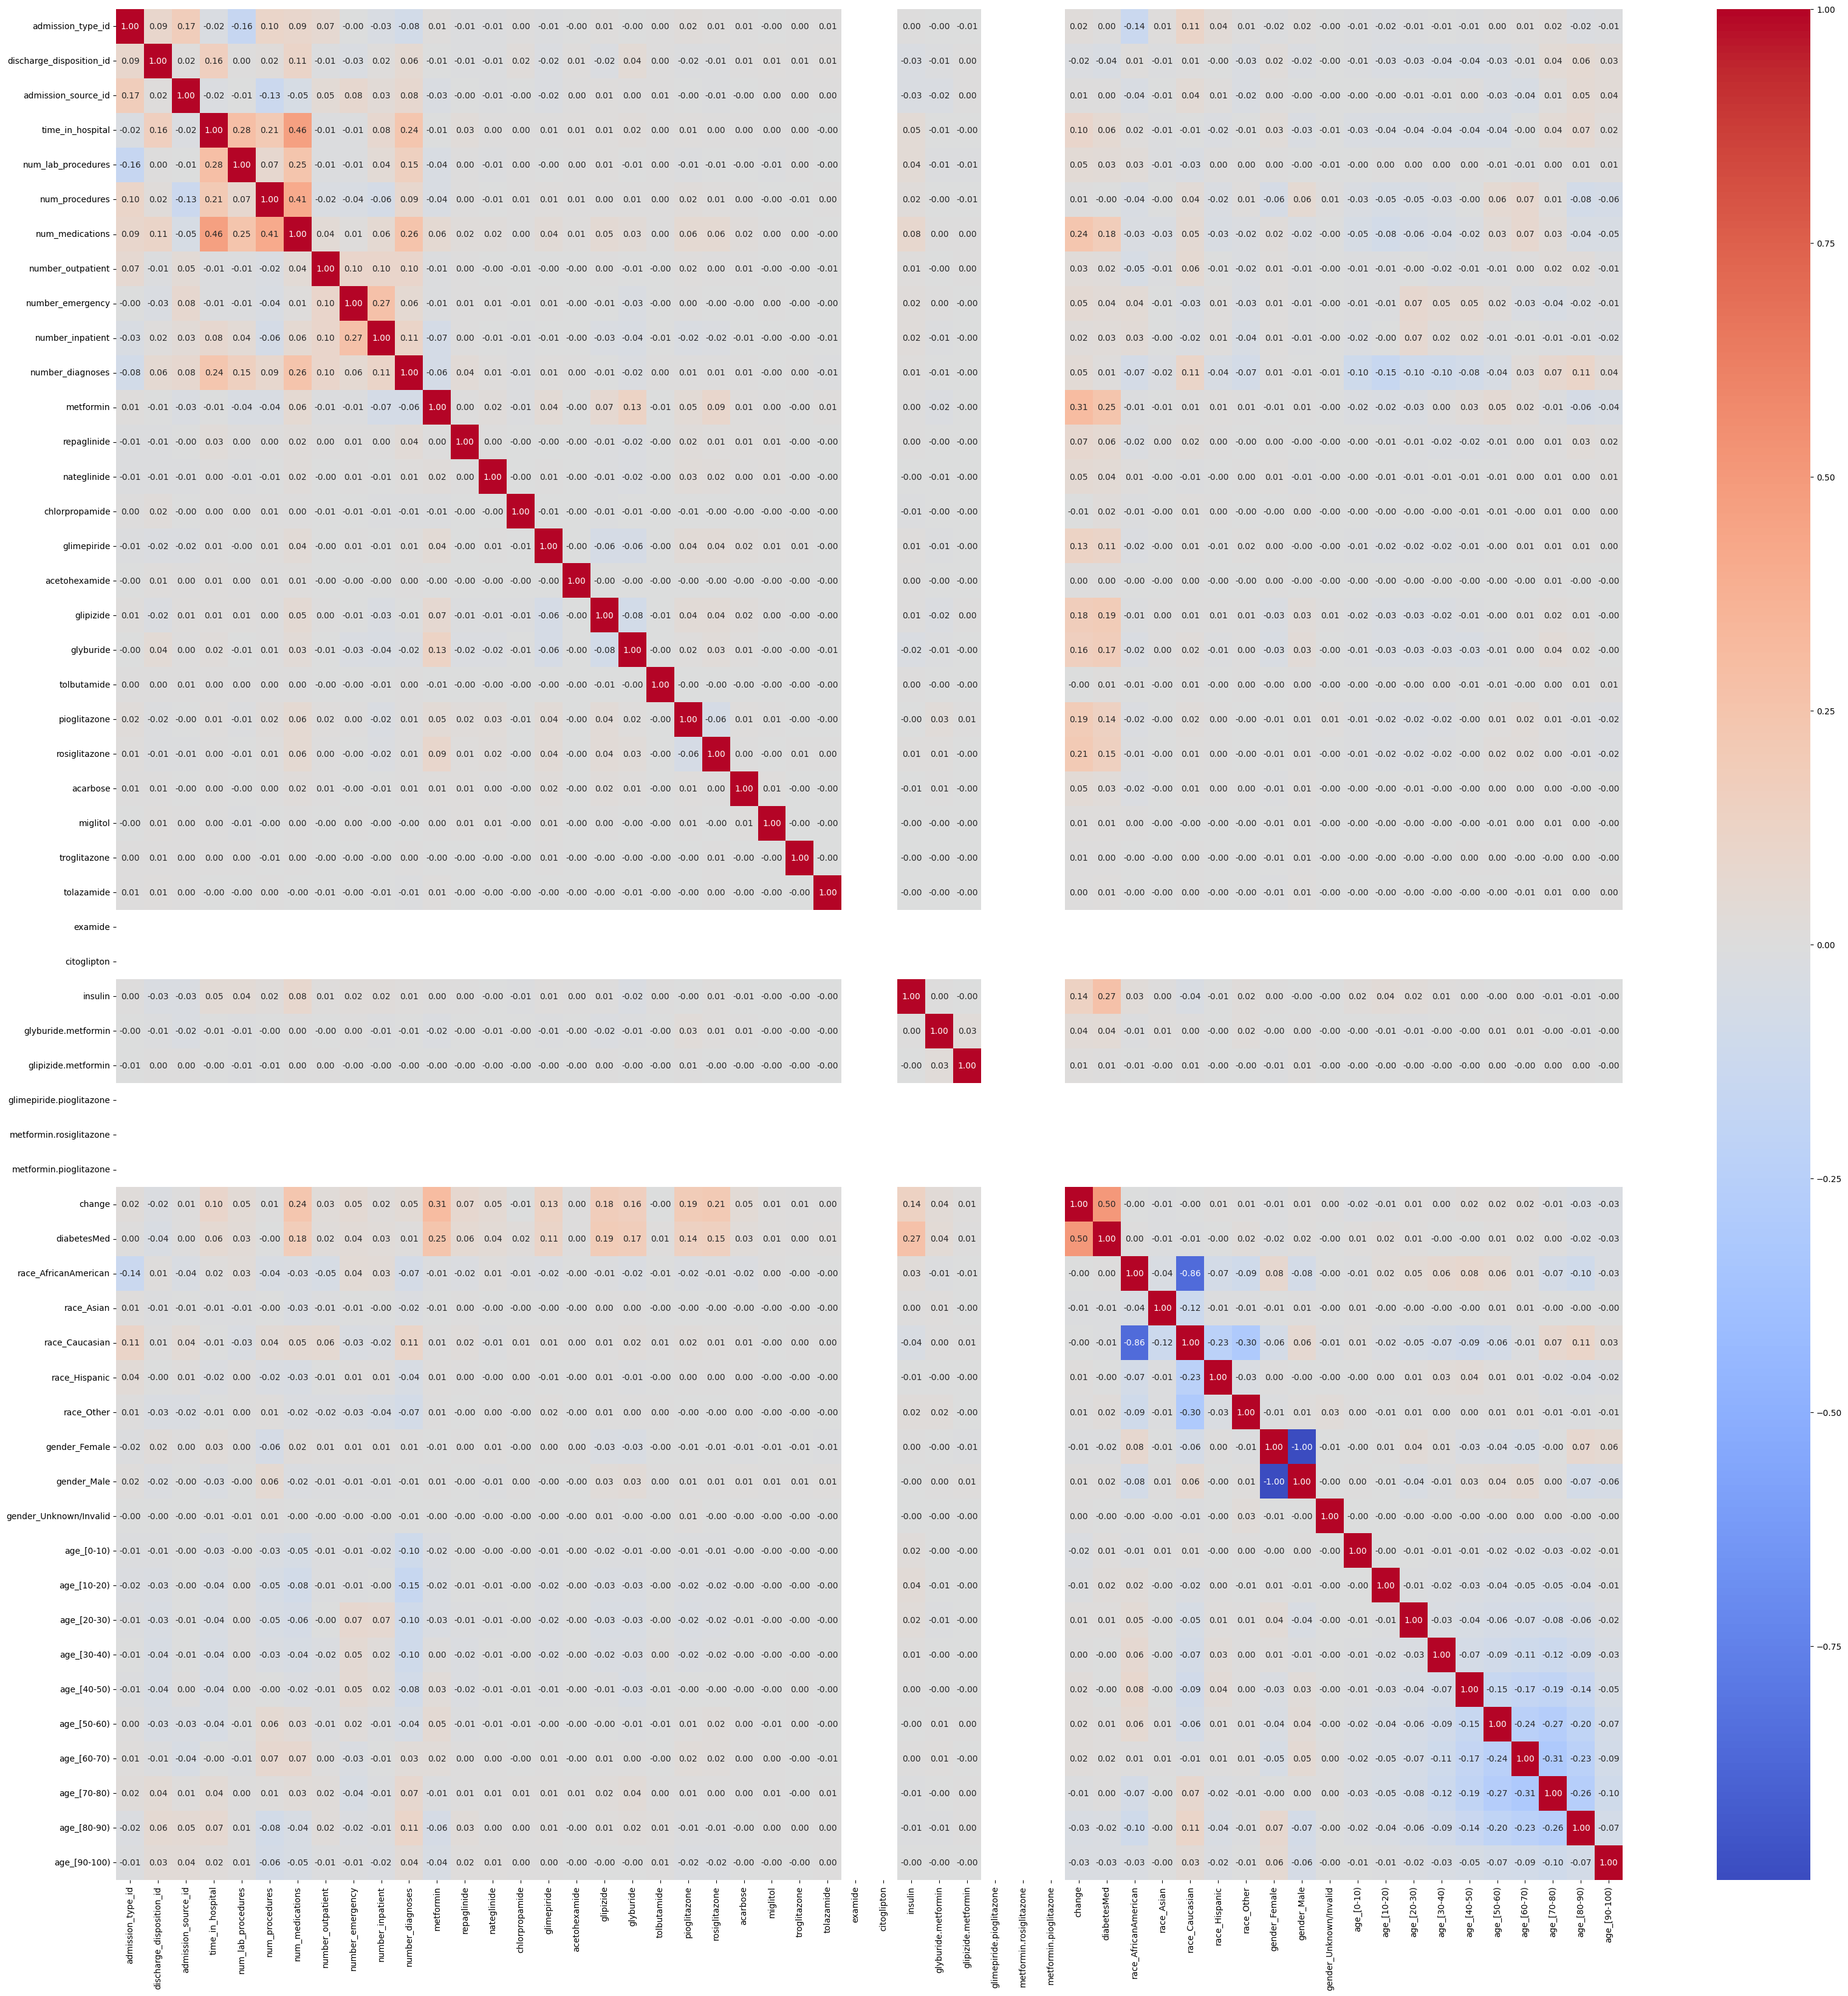

In [54]:
# plot a correlacao entre as variaveis
import matplotlib.pyplot as plt
import seaborn as sns

# divida o df em X e y
X = df.drop('readmitted', axis=1)
y = df['readmitted']

plt.figure(figsize=(40, 40))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75832 entries, 0 to 75831
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   admission_type_id         75832 non-null  float64
 1   discharge_disposition_id  75832 non-null  float64
 2   admission_source_id       75832 non-null  float64
 3   time_in_hospital          75832 non-null  float64
 4   num_lab_procedures        75832 non-null  float64
 5   num_procedures            75832 non-null  float64
 6   num_medications           75832 non-null  float64
 7   number_outpatient         75832 non-null  float64
 8   number_emergency          75832 non-null  float64
 9   number_inpatient          75832 non-null  float64
 10  number_diagnoses          75832 non-null  float64
 11  metformin                 75832 non-null  int64  
 12  repaglinide               75832 non-null  int64  
 13  nateglinide               75832 non-null  int64  
 14  chlorp

In [56]:
# Divisão do dataset em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# exporte os dados de treino e teste em csv diferentes

X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)